In [3]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
wine_quality = fetch_ucirepo(id=186)

# Pre-processing
df = wine_quality.data.original


def categorize_quality(quality):
    if quality < 7:
        return 'low'
    else:
        return 'high'


df['quality_category'] = df['quality'].apply(categorize_quality)

red = df[df['color'] == 'red']
white = df[df['color'] == 'white']

df_array = [red, white, df]
wine_names = ['red', 'white', 'red and white']

In [4]:
df_names = ['Red Wine', 'White Wine', 'Combined Wine']


def confusion_matrix_plot(y_test, y_pred, clf, model):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=clf.classes_)

    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for DataFrame {model.__class__.__name__}')
    plt.show()


def optimized_folds(model, X, y):
    best_score = 0
    best_folds = 0

    for folds in np.arange(2, 11):
        scores = cross_val_score(model, X, y, cv=folds, scoring='f1_macro')
        if scores.mean() > best_score:
            best_score = scores.mean()
            best_folds = folds

    print(f"Best Folds: {best_folds} | Best Score: {best_score}", end=" | ")
    return best_folds

Processing Red Wine...
              precision    recall  f1-score   support

        high       0.57      0.51      0.54        47
         low       0.92      0.93      0.93       273

    accuracy                           0.87       320
   macro avg       0.74      0.72      0.73       320
weighted avg       0.87      0.87      0.87       320



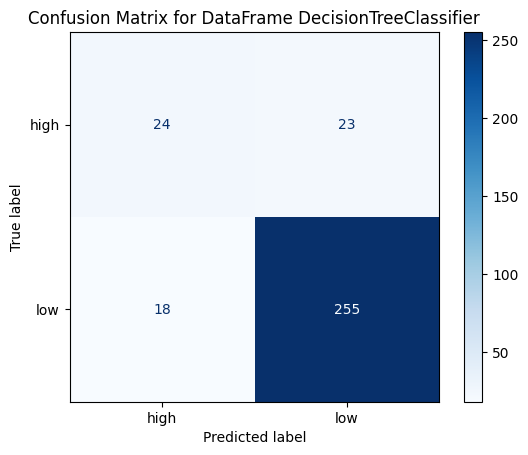

Processing White Wine...
              precision    recall  f1-score   support

        high       0.62      0.67      0.65       227
         low       0.90      0.88      0.89       753

    accuracy                           0.83       980
   macro avg       0.76      0.78      0.77       980
weighted avg       0.83      0.83      0.83       980



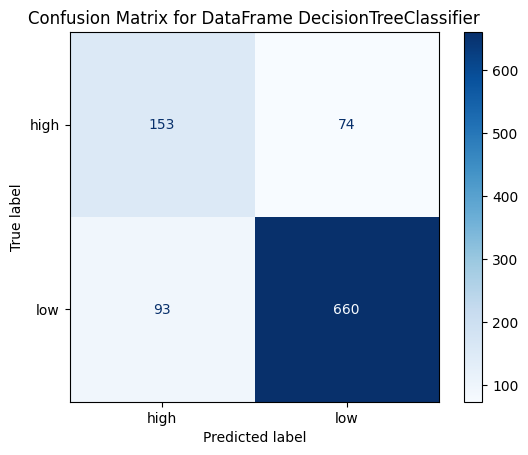

Processing Combined Wine...
              precision    recall  f1-score   support

        high       0.57      0.63      0.60       252
         low       0.91      0.88      0.90      1048

    accuracy                           0.83      1300
   macro avg       0.74      0.76      0.75      1300
weighted avg       0.84      0.83      0.84      1300



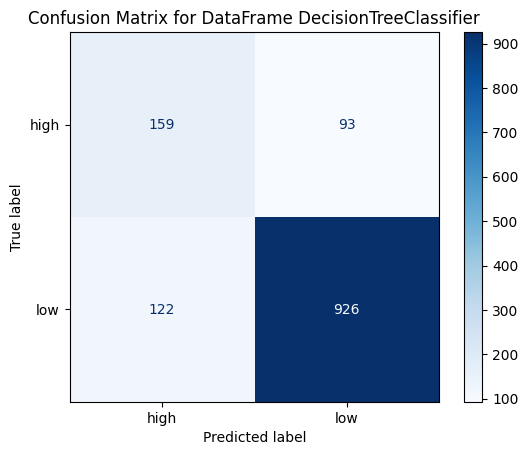

In [7]:


for i, df in enumerate(df_array):
    print("=" * 40)
    print(f"Processing {df_names[i]}...")
    print("=" * 40)
    
    X = df.drop(['quality', 'quality_category', 'color'], axis=1)
    y = df['quality_category']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)

    y_pred = dt.predict(X_test)
    print(classification_report(y_test, y_pred))
    confusion_matrix_plot(y_test, y_pred, dt, dt)
